In [99]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [101]:
df=pd.read_csv('Iris.csv')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [103]:
df.shape

(150, 6)

In [104]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [105]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [106]:
#
df=df.drop(columns='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [107]:
#
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

**Exploratory Data Analysis**

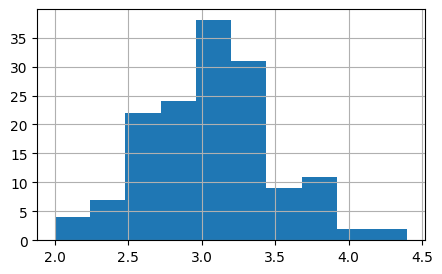

In [108]:
#
#to make visualization short
plt.figure(figsize=(5,3))
df['SepalWidthCm'].hist()
plt.show()                            #o/p is normal distribution curve means the model can quickly learn from the data

<Axes: >

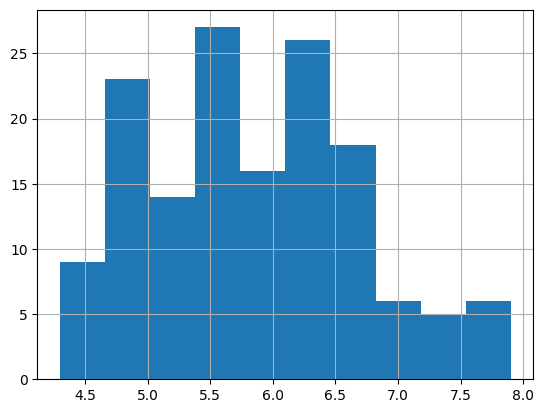

In [109]:
df['SepalLengthCm'].hist()                                         #o/p is similar to normal distribution curve 

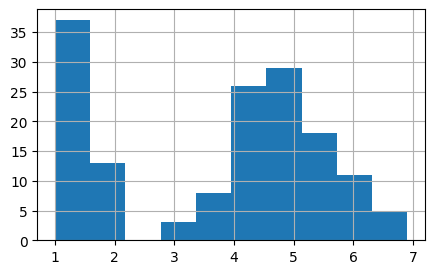

In [110]:
plt.figure(figsize=(5,3))
df['PetalLengthCm'].hist()
plt.show()                                         #o/p is - one class is seperated from the other two classes

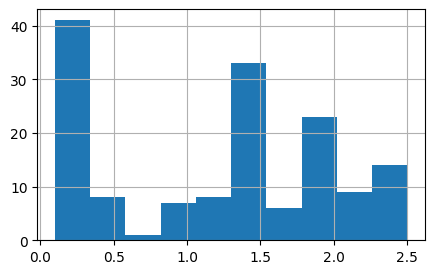

In [111]:
plt.figure(figsize=(5,3))
df['PetalWidthCm'].hist()
plt.show()                                                 #o/p - one class is seperated from the other two classes

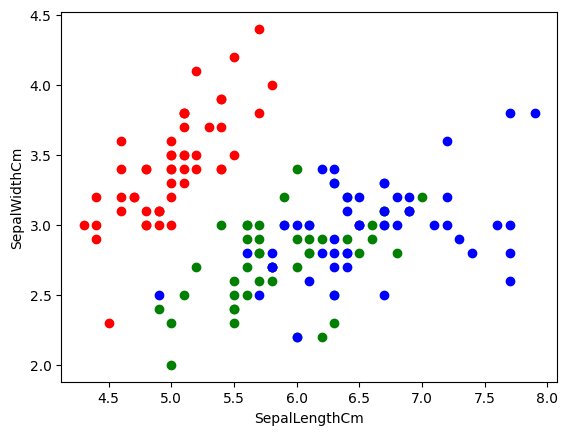

In [112]:
# Scatter plot
colors=['red','green','blue']
Species=['Iris-setosa','Iris-versicolor','Iris-virginica']

for i in range(3):
    x = df[df['Species'] == Species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=Species[i])   # you can do it for PetalLength,PetalWidth /SepalWidth,PetalLength
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()                                        #o/p - one class is different from two classes

**Correlation Matrix**

In [113]:
corr = df.select_dtypes(include=[np.number]).corr()

<Axes: >

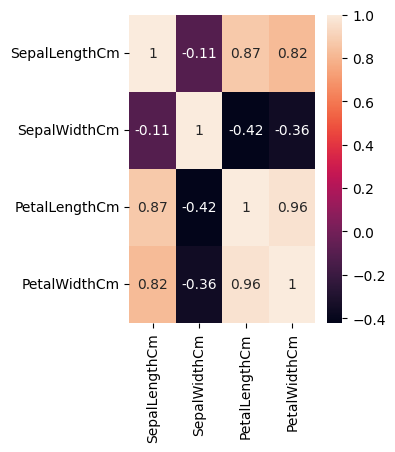

In [114]:
#it is better to understand correlation with heatmap
fig,ax = plt.subplots(figsize=(3,4))
sns.heatmap(corr,annot=True,ax=ax)                      #petallength,petalwidth have high correlation

**One Hot Encoding**

In [123]:
# df.replace({'Species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}},inplace=True)
# df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Model Training**

In [116]:
X=df.drop('Species',axis=1)
Y=df['Species']

In [117]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=42)

In [118]:
from sklearn.neighbors import KNeighborsClassifier 

In [119]:
model= KNeighborsClassifier ()

In [120]:
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [121]:
X_train_pred=model.predict(X_train)
print("accuracy of KNN  on training dataset - ")
print(accuracy_score(Y_train,X_train_pred))

accuracy of KNN  on training dataset - 
0.9666666666666667


In [122]:
X_test_pred=model.predict(X_test)
print("accuracy of KNN  on testing dataset - ")
print(accuracy_score(Y_test,X_test_pred))

accuracy of KNN  on testing dataset - 
1.0


**deploying using flask-connecting to frontend**

In [124]:
# save the model
import pickle
filename = 'savedmodel.sav'
pickle.dump(model, open(filename, 'wb'))

In [128]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [129]:
load_model = pickle.load(open(filename,'rb'))

In [127]:
load_model.predict([[6.0, 2.2, 4.0, 1.0]])

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)